# Zadanie rekrutacyjne 3 - Regresja logistyczna

Twoim zadaniem jest opracowanie __modelu regresji logistycznej__.

## Analiza danych

Przeanalizuj dane dostarczone w pliku `dane_zadanie_v1.0.xlsx`. 

Czy na ich podstawie zdecydujesz się opracować model regresji logistycznej? Uzasadnij odpowiedź.

Jeśli decydujesz się opracować model napisz także:
- Czy mimo wszystko masz jakieś wątpliwości? 
- Czy brakuje Ci informacji, które mogłyby w Twojej ocenie pomóc?

In [9]:
import pandas as pd

file_path = 'dane_zadanie_v1.0.xlsx'
data = pd.read_excel(file_path)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zm1     100 non-null    int64  
 1   Zm2     100 non-null    float64
 2   Zm3_a   100 non-null    float64
 3   Zm3_b   100 non-null    float64
 4   Zm3_c   100 non-null    float64
 5   Zm3     100 non-null    float64
 6   Zm4     77 non-null     object 
 7   Zm5     100 non-null    float64
 8   Target  100 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 7.2+ KB


In [11]:
data.head()

,Zm1,Zm2,Zm3_a,Zm3_b,Zm3_c,Zm3,Zm4,Zm5,Target
0,47,2.556346,0.245325,0.837421,1008.068531,207.098028,NaN,14.187720,0
1,52,5.440271,0.466611,0.184779,1000.823017,86.290555,Kat_d,30.193503,1
2,55,1.907546,0.970312,0.396966,1004.789753,387.025911,Kat_a,10.586882,1
3,51,7.990015,0.104896,0.875934,1004.476626,92.293651,Kat_d,44.344586,1
4,33,1.175730,0.860810,0.458833,1000.042185,394.984532,Kat_a,6.525302,1


In [12]:
data.describe()

,Zm1,Zm2,Zm3_a,Zm3_b,Zm3_c,Zm3,Zm5,Target
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.610000,3.218595,0.466414,0.485691,1004.785353,233.556128,17.863205,0.360000
std,9.421547,3.450591,0.300161,0.279500,2.800597,215.816346,19.150780,0.482418
min,23.000000,0.044092,0.004823,0.006683,1000.042185,0.097373,0.244712,0.000000
25%,43.000000,1.163509,0.194063,0.259428,1002.527810,51.914895,6.457474,0.000000
50%,51.000000,1.995937,0.427371,0.472234,1004.673694,173.290137,11.077451,0.000000
75%,55.000000,3.471258,0.736736,0.744681,1007.278576,372.297730,19.265479,1.000000
max,70.000000,20.317462,0.998535,0.938121,1009.994391,838.380260,112.761916,1.000000


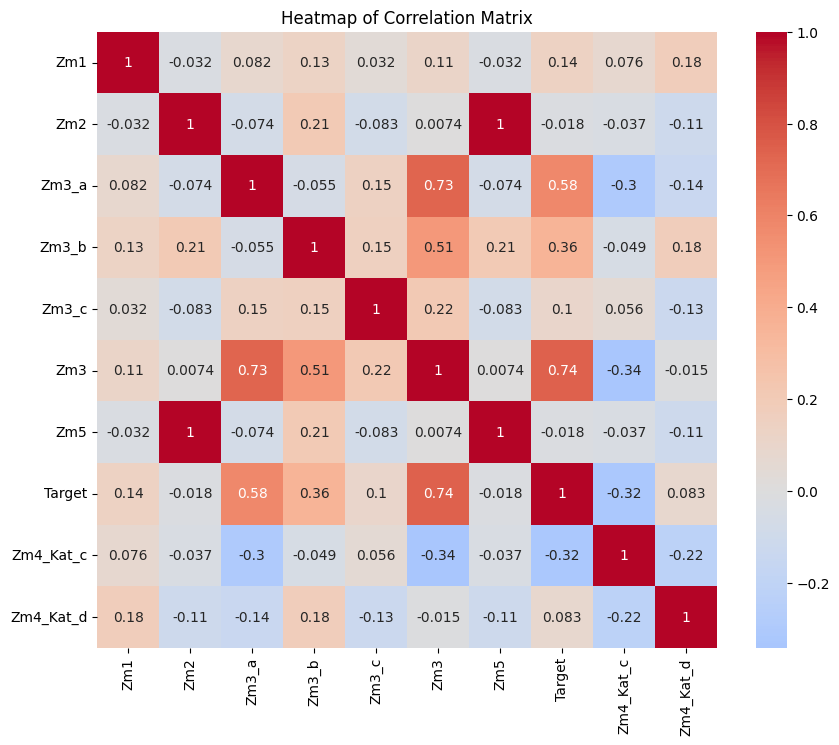

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

data_temp = data.dropna(subset=['Zm4'])
data_temp = pd.get_dummies(data_temp, columns=['Zm4'], drop_first=True)
correlation_matrix = data_temp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [63]:
removed_columns = ['Zm3_a', 'Zm3_b', 'Zm3_c',]
print(removed_columns)

['Zm3_a', 'Zm3_b', 'Zm3_c']


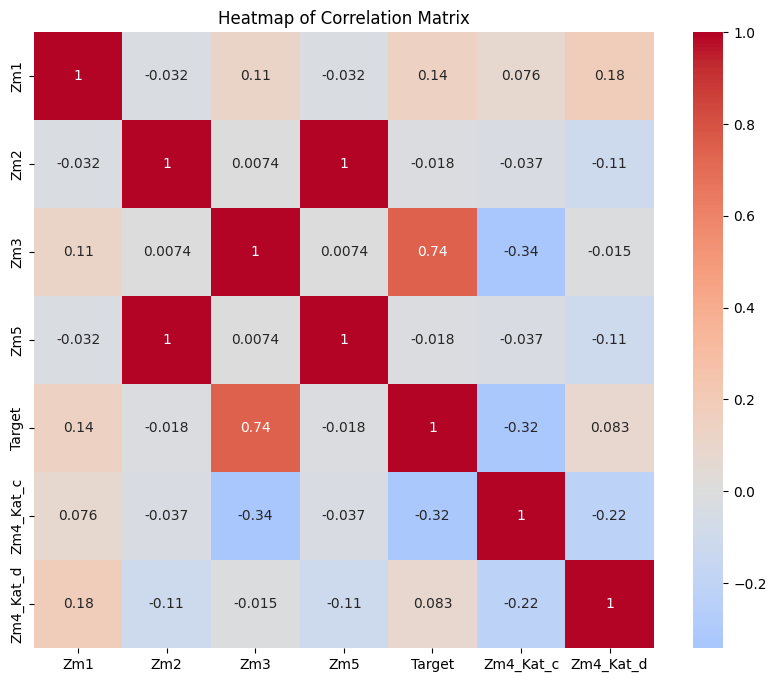

In [64]:
data_temp=data_temp.drop(columns=removed_columns)
correlation_matrix = data_temp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

- Zmienna  Target jest binarna, co jest odpowiednie dla regresji logistycznej.
- Brakujące wartości mogą wpływać na model. Można usunąć poszczególne wiersze lub całą kolumnę
- Dane są stosunkowo czyste i kompletne, z wyjątkiem brakujących wartości w jednej kolumnie
- Kolumny Zm3_a, Zm3_b, Zm3_c i Zm3 mogą być ze sobą silnie skorelowane, co mogłoby wpływać na model
- Zm3 jest najsilniej skorelowana z targetem


- 50% lub więcej wartości w kolumnie Target wynosi 0.
- Między 50% a 75% wartości w kolumnie Target wynosi 0.
- Między 75% a 100% wartości w kolumnie Target wynosi 1.

Takie rozkłady sugerują, że klasa 0 jest znacznie bardziej powszechna niż klasa 1. W kontekście uczenia maszynowego może to oznaczać, że masz do czynienia z niezbalansowanym zbiorem danych. Kilka kwestii, które mogą wynikać z takiej sytuacji to:

Niezbalansowany zbiór danych: Model może być bardziej skłonny do przewidywania klasy dominującej (0), co może prowadzić do problemów z dokładnością i efektywnością w przewidywaniu mniejszościowej klasy (1).

## Opracowanie modelu

Jeżeli nie zdecydujesz się opracować modelu, pozostaw tę sekcję pustą.

Jeśli decydujesz się opracować model, zamodeluj  `Target` w oparciu o zmienne `Zm1`-`Zm5` (zauważ, że `Zm3_a/b/c` są komponentami zmiennej `Zm3`). 

Możesz dokonywać standardowych przekształceń zmiennych `Zm` aby poprawić jakość działania modelu. 

Przedstaw i krótko opisz kolejne kroki modelowania.

Oceń jakość otrzymanego modelu.

In [13]:
data_cleaned = data.dropna(subset=['Zm4'])
data_cleaned


,Zm1,Zm2,Zm3_a,Zm3_b,Zm3_c,Zm3,Zm4,Zm5,Target
1,52,5.440271,0.466611,0.184779,1000.823017,86.290555,Kat_d,30.193503,1
2,55,1.907546,0.970312,0.396966,1004.789753,387.025911,Kat_a,10.586882,1
3,51,7.990015,0.104896,0.875934,1004.476626,92.293651,Kat_d,44.344586,1
4,33,1.175730,0.860810,0.458833,1000.042185,394.984532,Kat_a,6.525302,1
6,41,0.467024,0.580860,0.560523,1002.147673,326.284872,Kat_a,2.591982,1
...,...,...,...,...,...,...,...,...,...
92,52,8.220382,0.016773,0.474336,1003.123002,7.980735,Kat_c,45.623118,0
93,51,0.159713,0.112435,0.886996,1004.848044,100.212612,Kat_c,0.886408,0
94,42,1.813669,0.072132,0.285324,1001.948950,20.621185,Kat_c,10.065863,0
96,38,3.335370,0.066195,0.349925,1008.947639,23.370625,Kat_c,18.511301,0


In [14]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['Zm4'], drop_first=True)
data_cleaned

,Zm1,Zm2,Zm3_a,Zm3_b,Zm3_c,Zm3,Zm5,Target,Zm4_Kat_c,Zm4_Kat_d
1,52,5.440271,0.466611,0.184779,1000.823017,86.290555,30.193503,1,False,True
2,55,1.907546,0.970312,0.396966,1004.789753,387.025911,10.586882,1,False,False
3,51,7.990015,0.104896,0.875934,1004.476626,92.293651,44.344586,1,False,True
4,33,1.175730,0.860810,0.458833,1000.042185,394.984532,6.525302,1,False,False
6,41,0.467024,0.580860,0.560523,1002.147673,326.284872,2.591982,1,False,False
...,...,...,...,...,...,...,...,...,...,...
92,52,8.220382,0.016773,0.474336,1003.123002,7.980735,45.623118,0,True,False
93,51,0.159713,0.112435,0.886996,1004.848044,100.212612,0.886408,0,True,False
94,42,1.813669,0.072132,0.285324,1001.948950,20.621185,10.065863,0,True,False
96,38,3.335370,0.066195,0.349925,1008.947639,23.370625,18.511301,0,True,False


In [43]:
# removed_columns = ['Target']
removed_columns = ['Zm3_a', 'Zm3_b', 'Zm3_c', 'Target']
print(removed_columns)

['Zm3_a', 'Zm3_b', 'Zm3_c', 'Target']


In [44]:
from sklearn.model_selection import train_test_split


X = data_cleaned.drop(columns=removed_columns)
y = data_cleaned['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [48]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.875

In [49]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[8, 0],
       [2, 6]])

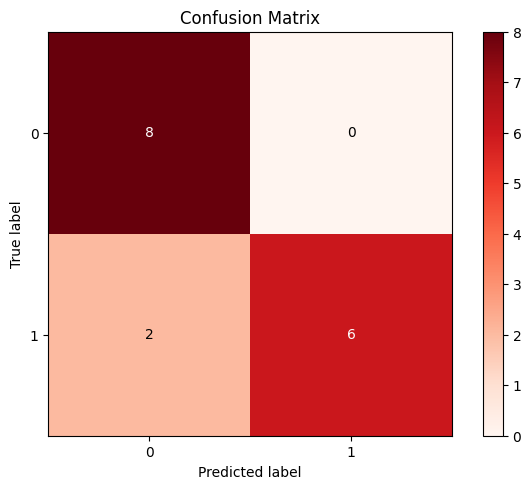

In [65]:
import numpy as np

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()

classes=[0,1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Wypisujemy liczby w kratkach
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

In [34]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.75      0.86         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16



In [84]:
from sklearn.pipeline import Pipeline

model_grid = LogisticRegression()
pipeline = Pipeline([('model', model_grid)])

In [85]:
# Definicja gridu hiperparametrów do przetestowania
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [86]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [87]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/pawel/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pawel/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pawel/.local/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/pawel/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 476, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fi

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [88]:
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik CV (accuracy):", grid_search.best_score_)

Najlepsze parametry: {'model__C': 0.1, 'model__penalty': 'l2'}
Najlepszy wynik CV (accuracy): 0.8871794871794872


In [89]:
best_model = grid_search.best_estimator_

In [90]:
y_pred = best_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

0.625

## Wyniki
- Dokładność: To podstawowa metryka wskazująca, jaki procent przewidywań modelu jest poprawnych.
- Macierz konfuzji: Daje szczegółowy obraz wydajności modelu poprzez liczenie liczby prawdziwie dodatnich, prawdziwie - ujemnych, fałszywie dodatnich i fałszywie ujemnych przypadków.
- Raport klasyfikacji: Zawiera szczegółowe metryki (precision, recall, F1-score) dla każdej z klas.

## Interpretacja wyników
Wyniki ewaluacji modelu wskażą nam jego skuteczność i pozwolą na ocenę, czy model dobrze klasyfikuje przypadki w zbiorze testowym. W szczególności zwrócimy uwagę na:

- Dokładność: Czy model jest wystarczająco dokładny dla naszych potrzeb?
- Macierz konfuzji: Czy model ma tendencję do popełniania określonego rodzaju błędów (np. fałszywie dodatnie lub fałszywie ujemne)?
- Raport klasyfikacji: Czy model jest zrównoważony w przewidywaniu obu klas (precision, recall, F1-score)?